In [2]:
import networkx as nx
import numpy as np

G = nx.DiGraph()
edges = [(1,2),(2,4),(4,6),(6,8),(8,10),(10,12),(12,17),(12,16),(12,15),(12,14),
    (1,3),(3,5),(5,7),(7,9),(9,11),(11,13),(13,18),(13,19),(13,20),(13,21)]
G.add_edges_from(edges)
# uncomment to add edges
# for i, (U, V) in enumerate(edges):
#     G[U][V]['weight'] = 0.3 if i % 2 == 0 else 0.5

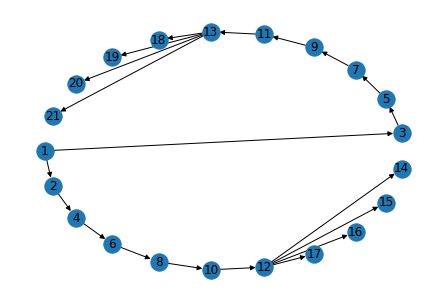

In [3]:
nx.draw_shell(G, with_labels=True)

In [4]:
from lib import get_embeddings, low_pass_filter_kernel
N = len(G.nodes)
S = np.arange(2.0, 20.1, 0.1) 
T = np.arange(1, 11, 1) 
q = 0.02
kernel = low_pass_filter_kernel
c = 2

embeddings = get_embeddings(G, S, T, q, low_pass_filter_kernel, c=2)
print(embeddings.shape)

(21, 3620)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)
print(pca.explained_variance_ratio_)

[0.7893439  0.11532899]


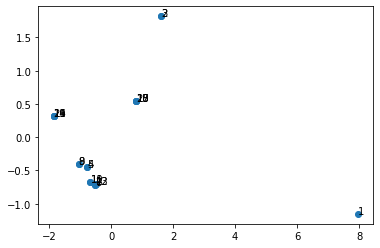

In [6]:
from matplotlib import pyplot as plt
pca_embeddings = pca.transform(embeddings)
fig, ax = plt.subplots(1)
ax.scatter(pca_embeddings[:,0], pca_embeddings[:, 1])
nodes = list(G.nodes)
for n, x, y in zip(nodes, pca_embeddings[:,0], pca_embeddings[:, 1]):
    ax.annotate(n, (x, y))